<a href="https://colab.research.google.com/github/1998456/Doc.Daves-Portfolio-/blob/main/Data_Scraping_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import_Dependencies

In [28]:
import pandas as pd
import numpy as np

from urllib.request import urlopen
from bs4 import BeautifulSoup
import re

Opening_Website_Link

In [29]:
url= "https://www.hubertiming.com/results/2018MLK"
html= urlopen(url)

Beautiful_Soup_recognizing_Url;

In [30]:
soup= BeautifulSoup(html)

Extracting Website_Title;

In [31]:
title= soup.title
print(title)
print(title.text)

<title>Race results for the 2018 MLK Dream Run!</title>
Race results for the 2018 MLK Dream Run!


Extracting Website_Link

In [32]:
links= soup.find_all('a',href=True)
for link in links:
    print(link.get('href'))

https://www.mlkdreamrun.com/
mailto:timing@hubertiming.com
https://www.hubertiming.com
/results/2018MLK10K
/results/2018MLK15K
/results/summary/2018MLK
#tabs-1
https://www.hubertiming.com/
https://facebook.com/hubertiming/


Getting_data_On_Website

In [33]:
all_rows= soup.find_all("tr")
print(all_rows)

[<tr colspan="2">
<b>5K:</b>
</tr>, <tr>
<td>Finishers:</td>
<td>191</td>
</tr>, <tr>
<td>Male:</td>
<td>78</td>
</tr>, <tr>
<td>Female:</td>
<td>113</td>
</tr>, <tr class="header">
<th>Place</th>
<th>Bib</th>
<th>Name</th>
<th>Gender</th>
<th>Age</th>
<th>City</th>
<th>State</th>
<th>Chip Pace</th>
<th>Time</th>
<th>Gender Place</th>
<th>Age Group</th>
<th>Age Group Place</th>
<th>Time to Start</th>
<th>Gun Time</th>
</tr>, <tr data-bib="1191">
<td>1</td>
<td>1191</td>
<td>

                    MAX RANDOLPH

                </td>
<td>M</td>
<td>29</td>
<td>WASHINGTON</td>
<td>DC</td>
<td>5:25</td>
<td>16:48</td>
<td>

                    1 of 78

                </td>
<td>M 21-39</td>
<td>

                    1 of 33

                </td>
<td>0:08</td>
<td>16:56</td>
</tr>, <tr data-bib="1080">
<td>2</td>
<td>1080</td>
<td>

                    NEED NAME KAISER RUNNER

                </td>
<td>M</td>
<td>25</td>
<td>PORTLAND</td>
<td>OR</td>
<td>5:39</td>
<td>17:31</td>
<td>

     

Get 5 rows of the Data;

In [34]:
allrows= soup.find_all("tr")
print (allrows[:5])

[<tr colspan="2">
<b>5K:</b>
</tr>, <tr>
<td>Finishers:</td>
<td>191</td>
</tr>, <tr>
<td>Male:</td>
<td>78</td>
</tr>, <tr>
<td>Female:</td>
<td>113</td>
</tr>, <tr class="header">
<th>Place</th>
<th>Bib</th>
<th>Name</th>
<th>Gender</th>
<th>Age</th>
<th>City</th>
<th>State</th>
<th>Chip Pace</th>
<th>Time</th>
<th>Gender Place</th>
<th>Age Group</th>
<th>Age Group Place</th>
<th>Time to Start</th>
<th>Gun Time</th>
</tr>]


Extracting_info_in_Data

In [35]:
allrows= soup.find_all('tr')
for row in allrows:
    row_list= row.find_all("td")
print(row_list)
for cell in row_list:
    print (cell.text)

[<td>191</td>, <td>1216</td>, <td>

                    ZULMA OCHOA

                </td>, <td>F</td>, <td>40</td>, <td>GRESHAM</td>, <td>OR</td>, <td>33:22</td>, <td>1:43:27</td>, <td>

                    113 of 113

                </td>, <td>F 40-54</td>, <td>

                    37 of 37

                </td>, <td>0:00</td>, <td>1:43:27</td>]
191
1216


                    ZULMA OCHOA

                
F
40
GRESHAM
OR
33:22
1:43:27


                    113 of 113

                
F 40-54


                    37 of 37

                
0:00
1:43:27


Extracting_Magor_Data

In [36]:
data=[]
allrows= soup.find_all('tr')
for row in allrows:
    row_list= row.find_all('td')
    dataRow=[]
    for cell in row_list:
        dataRow.append(cell.text)
    data.append(dataRow)
print(data)

[[], ['Finishers:', '191'], ['Male:', '78'], ['Female:', '113'], [], ['1', '1191', '\r\n\r\n                    MAX RANDOLPH\r\n\r\n                ', 'M', '29', 'WASHINGTON', 'DC', '5:25', '16:48', '\r\n\r\n                    1 of 78\r\n\r\n                ', 'M 21-39', '\r\n\r\n                    1 of 33\r\n\r\n                ', '0:08', '16:56'], ['2', '1080', '\r\n\r\n                    NEED NAME KAISER RUNNER\r\n\r\n                ', 'M', '25', 'PORTLAND', 'OR', '5:39', '17:31', '\r\n\r\n                    2 of 78\r\n\r\n                ', 'M 21-39', '\r\n\r\n                    2 of 33\r\n\r\n                ', '0:09', '17:40'], ['3', '1275', '\r\n\r\n                    DAN FRANEK\r\n\r\n                ', 'M', '52', 'PORTLAND', 'OR', '5:53', '18:15', '\r\n\r\n                    3 of 78\r\n\r\n                ', 'M 40-54', '\r\n\r\n                    1 of 27\r\n\r\n                ', '0:07', '18:22'], ['4', '1223', '\r\n\r\n                    PAUL TAYLOR\r\n\r\n         

Improving ur Data

In [37]:
data=[]
allrows= soup.find_all('tr')
for row in allrows:
    row_list= row.find_all("td")
    dataRow=[]
    for cell in row_list:
        dataRow.append(cell.text)
    data.append(dataRow)
titles= data[0]
data= data[1:]
print(titles)
print(data[-2:])

[]
[['190', '2087', '\r\n\r\n                    LEESHA POSEY\r\n\r\n                ', 'F', '43', 'PORTLAND', 'OR', '30:17', '1:33:53', '\r\n\r\n                    112 of 113\r\n\r\n                ', 'F 40-54', '\r\n\r\n                    36 of 37\r\n\r\n                ', '0:00', '1:33:53'], ['191', '1216', '\r\n\r\n                    ZULMA OCHOA\r\n\r\n                ', 'F', '40', 'GRESHAM', 'OR', '33:22', '1:43:27', '\r\n\r\n                    113 of 113\r\n\r\n                ', 'F 40-54', '\r\n\r\n                    37 of 37\r\n\r\n                ', '0:00', '1:43:27']]


Clean_Data_By_Removing_Titles

In [38]:
data=[]
allrows= soup.find_all('tr')
for row in allrows:
    row_list= row.find_all("td")
    dataRow=[]
    for cell in row_list:
        dataRow.append(cell.text)
    data.append(dataRow)
data= data[4:]
print(data[-2:])

[['190', '2087', '\r\n\r\n                    LEESHA POSEY\r\n\r\n                ', 'F', '43', 'PORTLAND', 'OR', '30:17', '1:33:53', '\r\n\r\n                    112 of 113\r\n\r\n                ', 'F 40-54', '\r\n\r\n                    36 of 37\r\n\r\n                ', '0:00', '1:33:53'], ['191', '1216', '\r\n\r\n                    ZULMA OCHOA\r\n\r\n                ', 'F', '40', 'GRESHAM', 'OR', '33:22', '1:43:27', '\r\n\r\n                    113 of 113\r\n\r\n                ', 'F 40-54', '\r\n\r\n                    37 of 37\r\n\r\n                ', '0:00', '1:43:27']]


Tiding & Arranging Data

In [39]:
df= pd.DataFrame(data)
df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,None,None,None,None,None,None,None,None,None,None,None,None,None,None
1,1,1191,\r\n\r\n MAX RANDOLPH\r\n\r...,M,29,WASHINGTON,DC,5:25,16:48,\r\n\r\n 1 of 78\r\n\r\n ...,M 21-39,\r\n\r\n 1 of 33\r\n\r\n ...,0:08,16:56
2,2,1080,\r\n\r\n NEED NAME KAISER R...,M,25,PORTLAND,OR,5:39,17:31,\r\n\r\n 2 of 78\r\n\r\n ...,M 21-39,\r\n\r\n 2 of 33\r\n\r\n ...,0:09,17:40
3,3,1275,\r\n\r\n DAN FRANEK\r\n\r\n...,M,52,PORTLAND,OR,5:53,18:15,\r\n\r\n 3 of 78\r\n\r\n ...,M 40-54,\r\n\r\n 1 of 27\r\n\r\n ...,0:07,18:22
4,4,1223,\r\n\r\n PAUL TAYLOR\r\n\r\...,M,54,PORTLAND,OR,5:58,18:31,\r\n\r\n 4 of 78\r\n\r\n ...,M 40-54,\r\n\r\n 2 of 27\r\n\r\n ...,0:07,18:38
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
187,187,1254,\r\n\r\n CYNTHIA HARRIS\r\n...,F,64,PORTLAND,OR,21:53,1:07:51,\r\n\r\n 110 of 113\r\n\r\n...,F 55+,\r\n\r\n 14 of 14\r\n\r\n ...,1:19,1:09:10
188,188,1085,\r\n\r\n EBONY LAWRENCE\r\n...,F,30,PORTLAND,OR,22:00,1:08:12,\r\n\r\n 111 of 113\r\n\r\n...,F 21-39,\r\n\r\n 53 of 53\r\n\r\n ...,0:58,1:09:10
189,189,1170,\r\n\r\n ANTHONY WILLIAMS\r...,M,39,PORTLAND,OR,22:19,1:09:11,\r\n\r\n 78 of 78\r\n\r\n ...,M 21-39,\r\n\r\n 33 of 33\r\n\r\n ...,0:08,1:09:19
190,190,2087,\r\n\r\n LEESHA POSEY\r\n\r...,F,43,PORTLAND,OR,30:17,1:33:53,\r\n\r\n 112 of 113\r\n\r\n...,F 40-54,\r\n\r\n 36 of 37\r\n\r\n ...,0:00,1:33:53


Cleaning ur data of extras

In [40]:
df= pd.DataFrame(data)
print(df.head(2))
print(df.tail(2))

     0     1                                                  2     3     4   \
0  None  None                                               None  None  None   
1     1  1191  \r\n\r\n                    MAX RANDOLPH\r\n\r...     M    29   

           5     6     7      8   \
0        None  None  None   None   
1  WASHINGTON    DC  5:25  16:48   

                                                  9        10  \
0                                               None     None   
1  \r\n\r\n                    1 of 78\r\n\r\n   ...  M 21-39   

                                                  11    12     13  
0                                               None  None   None  
1  \r\n\r\n                    1 of 33\r\n\r\n   ...  0:08  16:56  
      0     1                                                  2  3   4   \
190  190  2087  \r\n\r\n                    LEESHA POSEY\r\n\r...  F  43   
191  191  1216  \r\n\r\n                    ZULMA OCHOA\r\n\r\...  F  40   

           5   6     

Extracting_Headers & Columns

In [41]:
header_list=[]
col_headers= soup.find_all('th')
for col in col_headers:
    header_list.append(col.text)
print(header_list)

['Place', 'Bib', 'Name', 'Gender', 'Age', 'City', 'State', 'Chip Pace', 'Time', 'Gender Place', 'Age Group', 'Age Group Place', 'Time to Start', 'Gun Time']


Adding_Columns_to_your_Data

In [42]:
df.columns= header_list
df.head()

,Place,Bib,Name,Gender,Age,City,State,Chip Pace,Time,Gender Place,Age Group,Age Group Place,Time to Start,Gun Time
0,None,None,None,None,None,None,None,None,None,None,None,None,None,None
1,1,1191,\r\n\r\n MAX RANDOLPH\r\n\r...,M,29,WASHINGTON,DC,5:25,16:48,\r\n\r\n 1 of 78\r\n\r\n ...,M 21-39,\r\n\r\n 1 of 33\r\n\r\n ...,0:08,16:56
2,2,1080,\r\n\r\n NEED NAME KAISER R...,M,25,PORTLAND,OR,5:39,17:31,\r\n\r\n 2 of 78\r\n\r\n ...,M 21-39,\r\n\r\n 2 of 33\r\n\r\n ...,0:09,17:40
3,3,1275,\r\n\r\n DAN FRANEK\r\n\r\n...,M,52,PORTLAND,OR,5:53,18:15,\r\n\r\n 3 of 78\r\n\r\n ...,M 40-54,\r\n\r\n 1 of 27\r\n\r\n ...,0:07,18:22
4,4,1223,\r\n\r\n PAUL TAYLOR\r\n\r\...,M,54,PORTLAND,OR,5:58,18:31,\r\n\r\n 4 of 78\r\n\r\n ...,M 40-54,\r\n\r\n 2 of 27\r\n\r\n ...,0:07,18:38


# Begin_Data_Analysis

In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 192 entries, 0 to 191
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Place            191 non-null    object
 1   Bib              191 non-null    object
 2   Name             191 non-null    object
 3   Gender           191 non-null    object
 4   Age              191 non-null    object
 5   City             191 non-null    object
 6   State            191 non-null    object
 7   Chip Pace        191 non-null    object
 8   Time             191 non-null    object
 9   Gender Place     191 non-null    object
 10  Age Group        191 non-null    object
 11  Age Group Place  191 non-null    object
 12  Time to Start    191 non-null    object
 13  Gun Time         191 non-null    object
dtypes: object(14)
memory usage: 21.1+ KB


Dropping_Missing_Values & Checking_Shape;

In [44]:
df2= df.dropna(how='any')
df2.shape

(191, 14)

Changing a Non Data_Type_Column_to_a_Data_Type

In [45]:
df2.columns

Index(['Place', 'Bib', 'Name', 'Gender', 'Age', 'City', 'State', 'Chip Pace',
       'Time', 'Gender Place', 'Age Group', 'Age Group Place', 'Time to Start',
       'Gun Time'],
      dtype='object')

In [46]:
df2['Time_mins']= df2['Time'].str.replace(":.+","",regex=True).astype("int")
print(df2[['Gender','Time_mins']].tail())

    Gender  Time_mins
187      F          1
188      F          1
189      M          1
190      F          1
191      F          1


<ipython-input-46-a45a00e2838e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Time_mins']= df2['Time'].str.replace(":.+","",regex=True).astype("int")


Text(0.5, 1.0, 'Time_mins run comparison by both Genders')

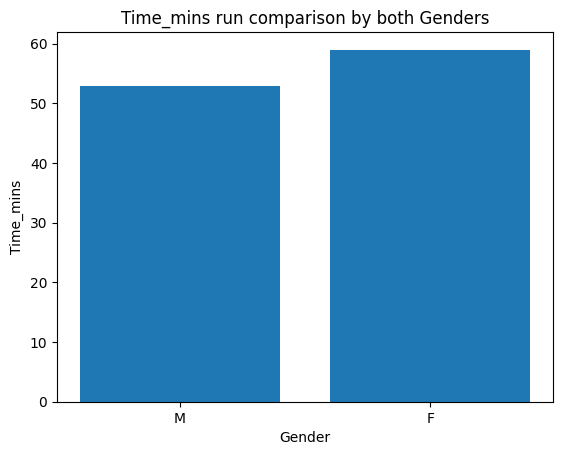

In [48]:
import matplotlib.pyplot as plt
plt.bar(df2['Gender'],df2['Time_mins'])
plt.xlabel('Gender')
plt.ylabel('Time_mins')
plt.title("Time_mins run comparison by both Genders")

In [49]:
df2.describe(include=[np.number])

,Time_mins
count,191.000000
mean,29.183246
std,17.050172
min,1.000000
25%,25.000000
50%,29.000000
75%,41.000000
max,59.000000


Box_Plot

Text(0, 0.5, 'Runtime')

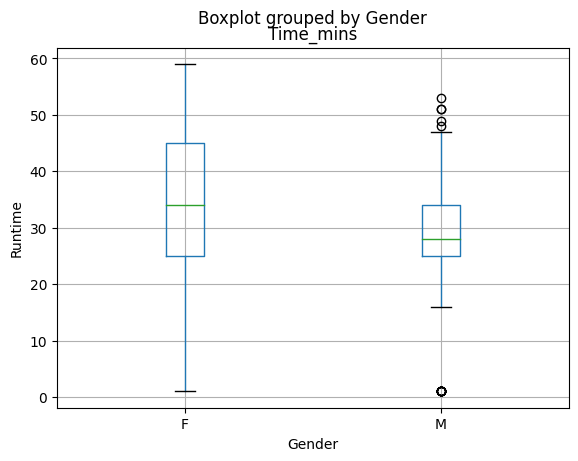

In [50]:
df2.boxplot(column='Time_mins',by='Gender')
plt.ylabel('Runtime')

Scatter_Plot

<ipython-input-52-1408f61e5155>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Age_i']= round(pd.to_numeric(df2['Age'],errors='coerce'))
<ipython-input-52-1408f61e5155>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2.dropna(how='any',inplace=True)


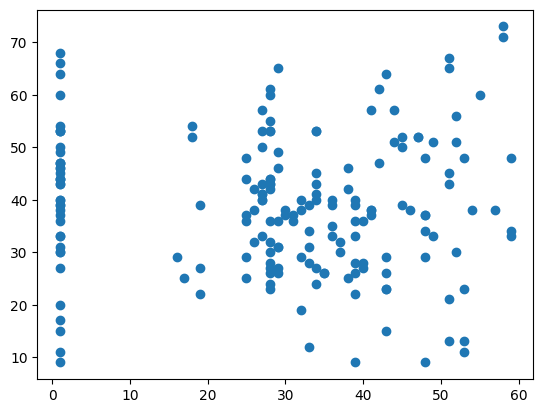

In [52]:
df2['Age_i']= round(pd.to_numeric(df2['Age'],errors='coerce'))
df2.dropna(how='any',inplace=True)

plt.scatter(df2['Time_mins'],df2['Age_i'])
plt.show()